Mario Pasquato - MSCA-IF fellow, Université de Montréal - mario.pasquato@gmail.com

# Linear Regression

## Goals of this unit

Until now we classified our data into groups either by coming up with a classification (clustering) or by predicting a discrete label (supervised classification). What if the label is a real number instead?
If that's the case we are out of luck, as we cannot really represent reals. We will deal with a [floating point](https://en.wikipedia.org/wiki/Floating-point_arithmetic) representation of a rational number in general, and we won't come back to this distinction again. At any rate, let's say that we are trying to predict a number rather than a yes/no or green/blue/orange/... classification.

We will be doing regression.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

oc_star_chemical = pd.read_csv('OC_UVES_iDR5.csv', low_memory = False)
element_names = np.array(['HE1', 'LI1', 'C1', 'C2', 'C3', 'N2', 'N3', 'O1', 'O2', 'NE1', \
                 'NE2', 'NA1', 'MG1', 'MG2', 'AL1', 'AL2', 'AL3', 'SI1', 'SI2', \
                 'SI3', 'SI4', 'S1', 'S2', 'S3', 'CA1', 'CA2', 'SC1', 'SC2', 'TI1',\
                 'TI2', 'V1', 'V2', 'CR1', 'CR2', 'MN1', 'FE1', 'FE2', 'FE3', 'CO1',\
                 'NI1', 'CU1', 'ZN1', 'SR1', 'Y1', 'Y2', 'ZR1', 'ZR2', 'NB1', 'MO1',\
                 'RU1', 'BA2', 'LA2', 'CE2', 'PR2', 'ND2', 'SM2', 'EU2', 'GD2', 'DY2'])

nas_by_column = np.array([oc_star_chemical[element].isna().sum() for element in element_names])

decent_elements = nas_by_column/oc_star_chemical.shape[0] < 0.3
decent_element_names = element_names[decent_elements]
clean_oc_star_chemical = oc_star_chemical[decent_element_names].dropna(axis = 0, how = 'any')
clean_oc_star_chemical

LI1   NA1       MG1       AL1   SI1    CA1   SC2   TI1   TI2  \
1     0.373980  6.00  7.590000  6.310000  7.40  6.380  3.32  4.88  4.86   
8     2.515278  6.04  7.470000  6.250000  7.48  6.440  3.32  4.86  4.88   
11    1.147955  6.05  7.470000  6.220000  7.41  6.430  3.28  4.80  4.82   
12    2.383068  6.23  7.500000  6.490000  7.50  6.540  3.48  4.99  4.97   
13    3.023544  6.06  7.430000  6.260000  7.43  6.520  3.28  4.87  4.86   
14    2.906560  6.08  7.510000  6.340000  7.45  6.580  3.33  4.99  4.92   
17    2.442342  6.06  7.500000  6.280000  7.44  6.420  3.29  4.84  4.82   
19    3.215872  6.08  7.460000  6.300000  7.41  6.530  3.30  4.95  4.85   
23    1.080000  5.63  6.900000  5.920000  6.99  5.351  2.64  4.38  4.44   
24    1.140000  5.70  7.010000  5.950000  7.06  5.451  2.67  4.41  4.53   
25    0.780000  5.69  7.110000  5.970000  7.04  5.741  2.71  4.49  4.53   
26    1.080000  5.69  7.010000  5.980000  7.04  5.391  2.66  4.45  4.53   
27    1.270000  5.80  7.010000  5.960000  7.08  5.411  2.77  4.49  4.57   
28    2.210000  5.84  7.090000  6.130000  7.17  5.851  2.81  4.76  4.61   
29   -0.070000  5.87  7.290000  6.120000  7.33  6.051  3.10  4.61  4.74   
32   -1.000000  6.08  7.490000  6.300000  7.37  6.300  3.32  4.85  4.85   
34    2.995748  5.97  7.380000  6.300000  7.33  6.430  3.04  4.80  4.76   
36    2.307210  6.14  7.380000  6.370000  7.16  6.620  3.16  5.11  4.53   
37    1.780000  6.14  7.430000  6.130000  7.39  6.411  3.14  4.75  4.85   
38    2.360000  6.11  7.480000  6.190000  7.43  6.371  3.14  4.79  4.86   
39    2.380000  6.13  7.480000  6.190000  7.39  6.391  3.13  4.81  4.88   
40    0.720000  6.27  7.590000  6.450000  7.58  6.541  3.36  5.00  5.06   
41    1.320000  6.14  7.530000  6.330000  7.43  6.421  3.19  4.90  4.93   
42    1.050000  6.20  7.500000  6.280000  7.47  6.471  3.25  4.86  4.96   
43    2.330000  6.10  7.430000  6.170000  7.38  6.361  3.11  4.76  4.85   
44    0.010000  6.20  7.540000  6.410000  7.55  6.441  3.25  4.90  5.01   
45    2.630000  6.07  7.420000  6.130000  7.36  6.361  3.12  4.75  4.87   
46    2.330000  6.16  7.490000  6.200000  7.43  6.431  3.17  4.82  4.91   
48    1.460000  6.18  7.450000  6.220000  7.43  6.401  3.19  4.78  4.90   
51    1.930000  6.12  7.420000  6.170000  7.39  6.391  3.14  4.75  4.87   
53    1.900000  5.70  7.300000  6.000000  7.11  5.921  2.90  4.70  4.61   
54   -0.040000  6.24  7.530000  6.470000  7.55  6.481  3.21  4.87  4.93   
55    1.450000  6.18  7.450000  6.200000  7.42  6.431  3.19  4.81  4.91   
56    0.210000  6.20  7.500000  6.390000  7.54  6.441  3.24  4.88  4.99   
57    2.410000  6.14  7.480000  6.220000  7.43  6.451  3.20  4.82  4.94   
58    2.440000  6.15  7.470000  6.190000  7.41  6.371  3.16  4.80  4.88   
59    1.890000  6.17  7.470000  6.180000  7.41  6.351  3.12  4.76  4.83   
60    0.140000  6.31  7.510000  6.420000  7.57  6.461  3.29  4.91  5.01   
61    0.170000  6.16  7.430000  6.190000  7.39  6.411  3.16  4.77  4.86   
66   -1.000000  0.99  7.750000  6.340000  7.87  6.370  3.49  4.91  4.67   
67    1.105064  6.45  7.470000  6.540000  7.45  6.490  3.34  5.12  4.80   
68   -1.000000  6.02  7.610000  6.100000  7.51  6.100  3.25  4.65  4.78   
69   -1.000000  6.16  7.500000  6.410000  7.47  6.370  3.36  4.81  4.93   
72    1.492496  5.96  7.340000  6.310000  7.33  6.380  3.22  4.86  4.84   
73   -1.000000  6.21  7.510000  6.340000  7.45  6.420  3.33  4.90  4.89   
74    1.130465  6.67  7.650000  6.700000  7.74  6.650  3.44  5.20  5.18   
77    0.935934  6.36  7.560000  6.390000  7.65  6.711  3.52  5.07  5.03   
78    3.126301  6.29  7.720000  6.650000  7.56  6.521  3.53  5.11  5.17   
80    3.091225  5.93  7.500000  6.590000  7.19  6.191  2.89  5.40  4.89   
82    0.570611  6.10  7.430000  6.310000  7.41  6.280  3.29  4.88  4.81   
83   -1.000000  6.81  7.780000  6.550000  7.72  6.610  3.52  5.24  5.05   
85    0.352684  5.94  7.470000  6.260000  7.33  6.170  3.01  4.85  4.73   
87   -0.506912  6.21  7.500000  6.45

## Linear regression

Arguably the simplest approach to regression is linear regression.
We will try to predict a variable $\mathbf{y}$ by a linear combination of variables $\mathbf{x}_1$, $\mathbf{x}_2$, ..., $\mathbf{x}_n$. In our example we could try to predict, say, Sodium. So $\mathbf{y}$ is going to be the NA1 column and each $\mathbf{x}_i$ is another column in the abundances data frame.

We want to predict $\mathbf{y}$ by

\begin{equation}
\mathbf{y}_p = \hat{\beta}_0 + \hat{\beta}_1 \mathbf{x}_1 + ... + \hat{\beta}_n \mathbf{x}_n 
\end{equation}

where $\mathbf{\hat{\beta}} = (\hat{\beta}_0, ..., \hat{\beta}_n)$ are the coefficients that we will find by minimizing a loss in the form

\begin{equation}
L(\mathbf{\hat{\beta}}) = | \mathbf{y}_p(\mathbf{\hat{\beta}}) - \mathbf{y} |^2
\end{equation}

This approach is called Ordinary Least Squares (OLS). It _will_ yield some $\mathbf{\beta}$ that minimizes the loss $L$, but whether we can trust the resulting estimators to have certain [properties](https://personal.utdallas.edu/~scniu/OPRE-6301/documents/Estimation.pdf) (unbiasedness, consistency, efficiency...) depends on a set of hypotheses listed e.g. [here](https://en.wikipedia.org/wiki/Ordinary_least_squares) or in your standard statistics course material. I am not covering this in detail in the following, but suffice it to say that if we assume a data generating process in the form

\begin{equation}
\mathbf{y} = \beta_0 + \beta_1 \mathbf{x}_1 + ... + \beta_n \mathbf{x}_n + \mathbf{\epsilon}
\end{equation}

where $\mathbf{y}$, $\mathbf{x}_1$, ..., $\mathbf{x}_n$ and $\mathbf{\epsilon}$ are now random variables with $\mathbf{\epsilon}$ representing measurement error which

* is uncorrelated with each $\mathbf{x}_1$, ..., $\mathbf{x}_n$,
* has mean 0,
* has the same variance for each observation,
* has zero correlation between observations,
* and is normal,

then everything is fine and dandy. Needless to say this is never the case. Notice that I dropped the hats on $\mathbf{\beta}$ with respect to the previous equation, because $\beta_i$ is the truth and $\hat{\beta_i}$ an estimator, i.e. the outcome of some procedure based on our data, that we hope will converge to the thruth if we have enough (infinite) data. It can be proven that this is the case if the above assumptions hold.

The ways to mess these assumption up are many. A professor is grading students, and $x_i$ is the grade of the $i-th$ student. Of course the professor remembers the previous grades, and (possibly subconsciously) tries to adjust the new grades based on the old ones. The grade of the $i+1$th student will anticorrelate with that of the $ith$ student. I observed this on real data when I was grading students in an electronics laboratory course as a teaching assistant. 

From the coding point of view, we will be using [statsmodels](https://www.statsmodels.org/dev/gettingstarted.html), as usual in python. Since this was not included in the original yml file you may want to make sure you have installed it (e.g. pip install statsmodels).

In [2]:
y = clean_oc_star_chemical['NA1']
X = clean_oc_star_chemical.drop('NA1', axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NA1   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     90.62
Date:                Tue, 26 Apr 2022   Prob (F-statistic):          2.22e-180
Time:                        10:45:28   Log-Likelihood:                 173.46
No. Observations:                 905   AIC:                            -310.9
Df Residuals:                     887   BIC:                            -224.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1441      0.571     -2.003      0.046      -2.265      -0.023
LI1           -0.0187      0.007     -2.595      0.010      -0.033      -0.005
MG1           -0.3503      0.099     -3.535      0.000      -0.545      -0.156
AL1            0.7149      0.101      7.044      0.000       0.516       0.914
SI1            0.5788      0.125      4.614      0.000       0.333       0.825
CA1            0.3431      0.084      4.096      0.000       0.179       0.507
SC2           -0.1655      0.076     -2.178      0.030      -0.315      -0.016
TI1           -0.4251      0.124     -3.416      0.001      -0.669      -0.181
TI2            0.3776      0.089      4.258      0.000       0.204       0.552
V1             0.1278      0.083      1.540      0.124      -0.035       0.291
CR1            0.4758      0.127      3.761      0.000       0.227       0.724
CR2            0.0145      0.061      0.237      0.813      -0.106       0.135
FE1            0.5847      0.136      4.304      0.000       0.318       0.851
FE2           -0.6872      0.107     -6.416      0.000      -0.897      -0.477
CO1            0.0968      0.087      1.117      0.264      -0.073       0.267
NI1           -0.5854      0.146     -3.998      0.000      -0.873      -0.298
Y2             0.1731      0.069      2.507      0.012       0.038       0.309
BA2            0.0007      0.042      0.017      0.986      -0.082       0.084
==============================================================================
Omnibus:                     1771.117   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4182709.867
Skew:                         -14.127   Prob(JB):                         0.00
Kurtosis:                     334.850   Cond. No.                     1.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Wow, lots of information. Let's concentrate first on the second table, whose columns are _coef_, _std err_, etc...
The first column is the coefficient $\beta_i$ that was estimated by OLS. You can think of it as the partial derivative of $y$ on $x_i$. For instance the coefficient of MG1 is $-0.35$ suggesting that increasing MG1 by one unit while keeping all other elements fixed should reduce NA1 by $-0.35$.

Under the hypotheses of OLS a standard error of these coefficients is also computed (second column). I am curious to see whether this corresponds to the standard deviation we would get by repeating our regression many times on random subsets of our data. To do this I want to extract just the coefficients of the model:

In [3]:
model.params

const   -1.144059
LI1     -0.018666
MG1     -0.350300
AL1      0.714896
SI1      0.578837
CA1      0.343085
SC2     -0.165506
TI1     -0.425099
TI2      0.377638
V1       0.127813
CR1      0.475765
CR2      0.014525
FE1      0.584691
FE2     -0.687174
CO1      0.096777
NI1     -0.585419
Y2       0.173134
BA2      0.000727
dtype: float64

Ah by the way, use _dir_ to see what is inside an object 

In [4]:
dir(model)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

All those weird underscored and double underscored things are not for you to use unless you really know what you are doing. The rest is. Back to our little test.

In [5]:
np.random.seed(40)
MG1_coefficients = []
for j in range(100):
    subsample = clean_oc_star_chemical.sample(frac=0.5)
    y_j = subsample['NA1']
    X_j = subsample.drop('NA1', axis=1)
    X_j = sm.add_constant(X_j)
    model = sm.OLS(y_j, X_j).fit()
    MG1_coefficients.append(model.params[2])

print(np.sqrt(np.array(MG1_coefficients).var()))
model.summary()

0.2717983691663085


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NA1   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     35.63
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           2.25e-71
Time:                        10:45:42   Log-Likelihood:                 4.3353
No. Observations:                 452   AIC:                             27.33
Df Residuals:                     434   BIC:                             101.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5458      0.942      0.579      0.563      -1.306       2.398
LI1           -0.0119      0.012     -0.966      0.334      -0.036       0.012
MG1           -0.6284      0.172     -3.655      0.000      -0.966      -0.290
AL1            1.0619      0.168      6.307      0.000       0.731       1.393
SI1            0.8025      0.216      3.716      0.000       0.378       1.227
CA1            0.3829      0.150      2.555      0.011       0.088       0.677
SC2            0.0201      0.136      0.148      0.882      -0.247       0.287
TI1           -0.6611      0.200     -3.299      0.001      -1.055      -0.267
TI2            0.8855      0.160      5.548      0.000       0.572       1.199
V1             0.1470      0.135      1.087      0.278      -0.119       0.413
CR1            0.6887      0.227      3.036      0.003       0.243       1.135
CR2            0.0384      0.106      0.362      0.717      -0.170       0.246
FE1            1.1559      0.230      5.034      0.000       0.705       1.607
FE2           -1.5601      0.189     -8.233      0.000      -1.933      -1.188
CO1           -0.0356      0.135     -0.265      0.791      -0.300       0.229
NI1           -1.3099      0.261     -5.011      0.000      -1.824      -0.796
Y2             0.4039      0.119      3.403      0.001       0.171       0.637
BA2           -0.0933      0.076     -1.224      0.222      -0.243       0.057
==============================================================================
Omnibus:                      739.874   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           396176.522
Skew:                          -9.154   Prob(JB):                         0.00
Kurtosis:                     146.878   Cond. No.                     1.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Even though $100 < +\infty$ it still looks like that the standard error is underestimated for this data. Unsurprisingly some hypothesis (normality?) breaks down.

Anyway, if we take for granted the normality hypothesis, which looks false here but never mind, then we can use a t-test to check whether the value of the coefficient is actually different from $0$, i.e. if we can reject the null hypothesis that it is $0$. The $P>|t|$ column reports the relevant p-value; if it is very small we can believe that indeed that coefficient is non-zero, so the relevant variable matters in predicting $\mathbf{y}$. This can be used for variable selection.

A word on $R^2$ or $R-$squared as written in the table above. This is the square of the correlation coefficient between $y$ and $y_p$. Also called the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination). The bigger the better, of course.

Anyway, let's see how good is our model in prediction (on the same data it was trained on, nonetheless!):

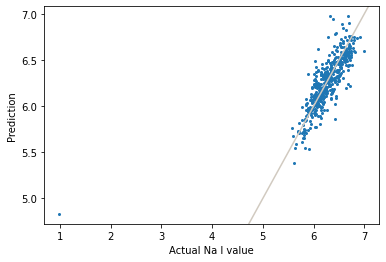

In [6]:
predicted_NA1 = model.predict(X_j)
plt.scatter(y_j, predicted_NA1, s=4)
plt.xlabel("Actual Na I value")
plt.ylabel("Prediction")
agreeable_gray = "#D1CAC0" #https://thecolorconcierge.com/agreeable-gray
plt.axline((5, 5), slope=1.0, color=agreeable_gray)
plt.show()

Let's check the coefficient of determination:

In [7]:
R = np.corrcoef(x=y_j, y=predicted_NA1)
R[0,1]*R[0,1]

0.5825933790144264

## Regression diagnostics

Just because we fit a linear regression with OLS (or any other method for that matter) does not mean that the dependences on the dataset are really linear or that any other assumption holds.

There are a few ways to inspect the results of our regression to tell if something needs further attention.

### Leverage
Some points may be very influential in determining the regression coefficients. The [leverage](https://en.wikipedia.org/wiki/Leverage_%28statistics%29) of the $i$-th point answers the question: how much does the predicted value ${y_p}_i$ change when the observed $y_i$ value changes?
That is:
\begin{equation}
l_i = \frac{\partial {y_p}_i}{\partial y_i}
\end{equation}

A plot can clarify this concept.

![Leverage](leverage.png)

Statsmodels allows us to make a plot of this.

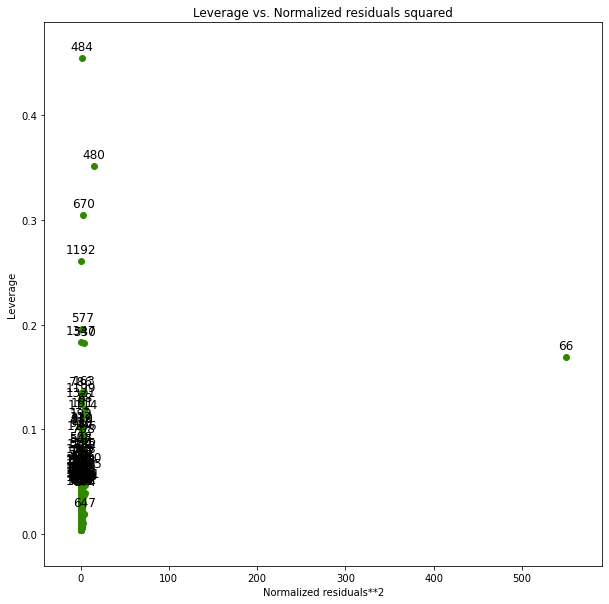

In [8]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2 as plr

clean_oc_star_chemical = oc_star_chemical[decent_element_names].dropna(axis = 0, how = 'any')
y = clean_oc_star_chemical['NA1']
X = clean_oc_star_chemical.drop('NA1', axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predicted_NA1 = model.predict(X)

fig, ax = plt.subplots(figsize=(10, 10))
fig = plr(model, ax=ax, color = "#318800")
plt.show()

This is pretty ugly, let's try to make it look better. We need to extract the leverage and other measures from the influence object.

You can take a look at [Cook's distance](https://notebook.community/DistrictDataLabs/yellowbrick/examples/bbengfort/cooks_distance) and [residuals](https://online.stat.psu.edu/stat462/node/247) and [other stuff](https://songhuiming.github.io/pages/2016/11/27/linear-regression-in-python-outliers-leverage-detect/) but the bottom line is that there are several ways to measure how influential a point is and how off the regression hyperplane it is. Finding points that are both and inspecting them is a good idea.




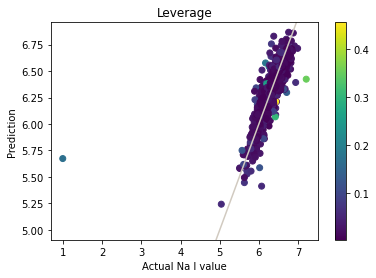

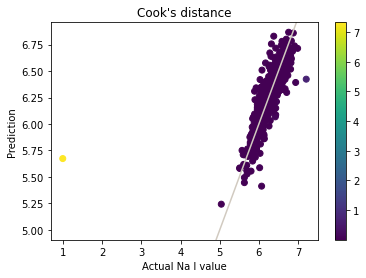

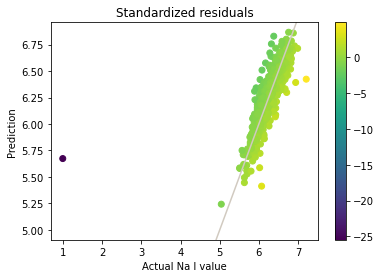

In [10]:
influence = model.get_influence()
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance
standardized_residuals = influence.resid_studentized_internal
studentized_residuals = influence.resid_studentized_external

plt.scatter(y, predicted_NA1, c=leverage, cmap='viridis')
plt.xlabel("Actual Na I value")
plt.ylabel("Prediction")
plt.title("Leverage")
plt.colorbar()
plt.axline((5, 5), slope=1.0, color=agreeable_gray)
plt.show()

plt.scatter(y, predicted_NA1, c=cooks_d[0], cmap='viridis')
plt.xlabel("Actual Na I value")
plt.ylabel("Prediction")
plt.title("Cook's distance")
plt.colorbar()
plt.axline((5, 5), slope=1.0, color=agreeable_gray)
plt.show()

plt.scatter(y, predicted_NA1, c=standardized_residuals, cmap='viridis')
plt.xlabel("Actual Na I value")
plt.ylabel("Prediction")
plt.title("Standardized residuals")
plt.colorbar()
plt.axline((5, 5), slope=1.0, color=agreeable_gray)
plt.show()

Let's redo the plot, maybe taking the log of the residual this time.

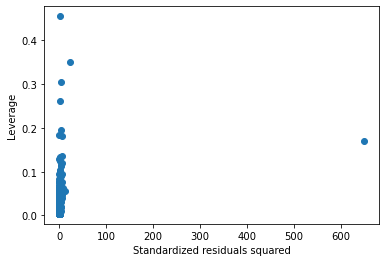

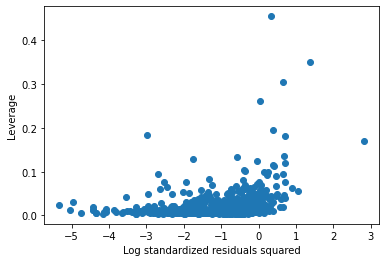

In [11]:
residuals_squared = standardized_residuals*standardized_residuals
plt.scatter(residuals_squared, leverage)
plt.xlabel("Standardized residuals squared")
plt.ylabel("Leverage")
plt.show()

plt.scatter(np.log10(residuals_squared), leverage)
plt.xlabel("Log standardized residuals squared")
plt.ylabel("Leverage")
plt.show()

Points with high residual (essentially outliers, again) are to the right of this plot. Influential points are at the top.

When points with high residual are also influential then our regression is mostly driven by outliers.
Let's find who the top 1% in terms of residuals are:

In [12]:
clean_oc_star_chemical[residuals_squared > np.quantile(residuals_squared, 0.99)]

LI1   NA1   MG1   AL1   SI1    CA1   SC2   TI1   TI2     V1   CR1  \
66   -1.000000  0.99  7.75  6.34  7.87  6.370  3.49  4.91  4.67  4.080  5.51   
68   -1.000000  6.02  7.61  6.10  7.51  6.100  3.25  4.65  4.78  3.830  5.28   
163   2.440000  6.71  7.67  6.70  7.52  5.991  3.48  5.50  5.22  4.577  6.23   
174   2.620000  6.38  7.79  7.01  7.74  6.571  3.37  5.38  5.27  4.517  5.98   
315   1.491220  6.07  7.30  5.80  7.09  6.000  2.64  4.54  4.34  3.587  4.99   
480   1.650000  7.21  7.22  6.70  7.14  7.371  2.77  5.78  4.73  5.267  6.19   
530   1.150000  6.17  7.28  6.42  7.58  6.151  3.38  5.08  5.01  4.307  5.66   
555   1.773288  6.32  7.51  6.35  7.63  6.621  3.02  5.03  5.24  4.447  5.88   
1110  1.380000  6.94  7.61  6.39  7.81  6.891  3.27  5.02  5.03  4.207  5.63   
1191  3.323649  6.08  7.44  6.55  7.44  6.331  2.92  4.96  4.71  4.257  5.69   

        CR2   FE1   FE2   CO1   NI1    Y2    BA2  
66    5.695  7.46  7.95  5.15  6.49  1.83  2.054  
68    6.230  7.33  7.72  5.02  6.23  2.16  2.304  
163   6.055  7.76  7.79  5.52  6.65  2.63  1.574  
174   5.765  7.75  7.81  5.31  6.44  2.56  2.284  
315   4.915  6.94  6.87  4.46  5.71  1.33  1.924  
480   5.795  7.20  7.81  5.27  6.19  2.15  1.504  
530   5.505  7.26  7.27  5.02  6.13  3.23  3.634  
555   5.685  7.44  7.26  5.11  6.35  2.35  2.714  
1110  5.595  7.32  7.41  5.04  6.51  2.23  2.554  
1191  5.665  7.69  7.56  4.96  6.10  2.47  2.154

I wonder if these are the same outliers we found back then when we used DBSCAN...

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import RobustScaler
rs = RobustScaler(quantile_range=(20.0, 80.0))
robust_scaled_oc_star_chemical = rs.fit_transform(clean_oc_star_chemical)
robust_scaled_oc_star_chemical = pd.DataFrame(robust_scaled_oc_star_chemical)

db = DBSCAN(eps=2, min_samples=2).fit(robust_scaled_oc_star_chemical)

labels = db.labels_
is_noise_point = (labels < 0)

clean_oc_star_chemical[is_noise_point]

LI1   NA1   MG1   AL1   SI1    CA1   SC2   TI1   TI2     V1   CR1  \
66   -1.000000  0.99  7.75  6.34  7.87  6.370  3.49  4.91  4.67  4.080  5.51   
68   -1.000000  6.02  7.61  6.10  7.51  6.100  3.25  4.65  4.78  3.830  5.28   
80    3.091225  5.93  7.50  6.59  7.19  6.191  2.89  5.40  4.89  4.627  5.70   
163   2.440000  6.71  7.67  6.70  7.52  5.991  3.48  5.50  5.22  4.577  6.23   
200  -1.000000  5.04  6.79  5.51  6.71  5.630  2.25  4.03  4.11  2.940  4.46   
310   1.160000  5.96  7.39  6.33  7.18  6.011  2.89  5.04  4.44  4.327  5.66   
480   1.650000  7.21  7.22  6.70  7.14  7.371  2.77  5.78  4.73  5.267  6.19   
484   0.700000  6.43  6.63  6.32  7.48  6.641  1.96  4.77  4.06  4.197  5.34   
530   1.150000  6.17  7.28  6.42  7.58  6.151  3.38  5.08  5.01  4.307  5.66   
577   2.997886  6.26  7.07  6.58  7.45  6.190  2.99  5.04  4.81  5.100  5.53   
670   2.331073  6.42  7.34  6.43  7.33  5.911  2.62  5.32  4.68  4.907  5.51   
786   3.360000  6.41  7.83  6.25  7.51  6.461  2.72  4.74  4.58  4.487  5.63   
1192  2.568186  6.20  7.45  6.45  7.37  6.460  3.25  4.83  4.73  4.650  5.46   
1199  2.849062  6.29  7.31  6.60  7.28  6.101  2.93  5.37  4.64  4.847  5.56   
1321  1.400000  5.57  7.22  6.07  7.09  5.911  2.81  4.44  4.48  4.007  5.12   
1347 -0.010000  6.55  7.45  6.74  7.26  6.591  2.90  5.50  4.98  4.687  6.00   

        CR2   FE1   FE2   CO1   NI1    Y2    BA2  
66    5.695  7.46  7.95  5.15  6.49  1.83  2.054  
68    6.230  7.33  7.72  5.02  6.23  2.16  2.304  
80    5.415  7.37  7.21  5.26  5.99  2.08  2.224  
163   6.055  7.76  7.79  5.52  6.65  2.63  1.574  
200   4.455  6.31  6.34  3.85  5.07  1.30  1.304  
310   5.345  7.27  6.83  4.97  6.07  1.91  1.324  
480   5.795  7.20  7.81  5.27  6.19  2.15  1.504  
484   6.205  6.32  7.37  4.34  5.47  2.12  1.364  
530   5.505  7.26  7.27  5.02  6.13  3.23  3.634  
577   5.705  7.47  7.55  6.19  6.30  2.55  2.120  
670   5.815  7.53  7.81  5.43  6.27  3.81  3.944  
786   5.415  7.44  7.12  4.79  6.20  1.98  1.764  
1192  5.580  7.41  7.39  6.24  6.11  1.95  1.780  
1199  5.525  7.63  7.40  5.18  6.29  2.72  2.824  
1321  5.945  6.66  6.81  4.81  5.78  1.78  1.224  
1347  5.075  7.25  7.27  4.78  6.34  2.48  2.714

It looks like there are quite a few points in common, indeed.

In [14]:
outliers = set(clean_oc_star_chemical[is_noise_point].index)
high_residual = set(clean_oc_star_chemical[residuals_squared > np.quantile(residuals_squared, 0.99)].index)

outliers.intersection(high_residual)

{66, 68, 163, 480, 530}

Let's throw these points away and move on

In [15]:
clean_oc_star_chemical_nooutlier = clean_oc_star_chemical[residuals_squared < np.quantile(residuals_squared, 0.99)].copy()

## Added variable plots

We saw above that the $i$-th coefficient of a linear regression is the partial derivative of $y$ with respect to the $i$-th variable $x_i$. This is not the total derivative of $y$ with respect to the $i$-th variable $x_i$, meaning that if a third variable $x_j$ is correlated with $x_i$, the overall effect of changing $x_i$ may be different from that of changing $x_i$ while keeping $x_j$ constant.

Suppose that we want to understand our regression better by looking at individual plot of $y$ against each regressor.
If we just plot $y$ versus $x_i$ we will se the the overall effect of changing $x_i$. Let's consider a synthetic example:

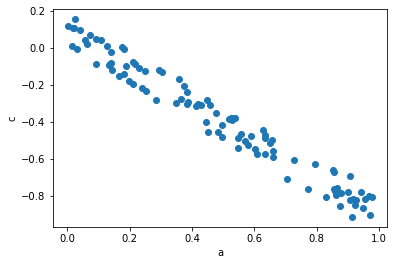

Ooops, c decreases with a. Not what I expected!


In [18]:
np.random.seed(888)
a = np.random.uniform(size=100)
b = -2.0*a + 0.2*np.random.uniform(size=100) #b correlates with a
c = a + b + 0.01*np.random.normal(size=100) #c is a linear combination of a and b with very simple coefficients: 1 and 1

plt.scatter(a, c)
plt.xlabel("a")
plt.ylabel("c")
plt.show()

print("Ooops, c decreases with a. Not what I expected!")

We can use a partial dependence plot or added variable plot to visualize the effect of changing $a$ while keeping $b$ constant. This is provided by statsmodels.

eval_env: 1


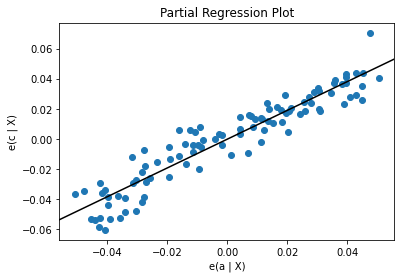

In [35]:
abc = pd.DataFrame(data={"a":a, "b":b, "c":c})

fig = sm.graphics.plot_partregress(
    "c", "a", "b", data=abc, obs_labels = False
)

[How to achieve this](https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html)?

First we regress $y$ against all variables except $x_i$, and we take the residuals to this regression.
Then we regress $x_i$ against all other variables and we take the residuals to this regression.
We then plot them against each other.

eval_env: 1


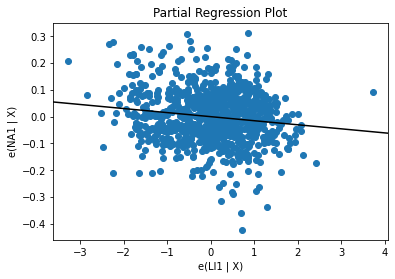

In [39]:
clean_oc_star_chemical_nooutlier.columns

#sm.graphics.plot_partregress_grid(model)
fig = sm.graphics.plot_partregress(
    "NA1", "LI1", ['MG1', 'AL1', 'SI1', 'CA1', 'SC2', 'TI1', 'TI2', 'V1', 'CR1', 'CR2', 'FE1', 'FE2', 'CO1', 'NI1', 'Y2', 'BA2'], obs_labels=False, data=clean_oc_star_chemical_nooutlier
)


eval_env: 1


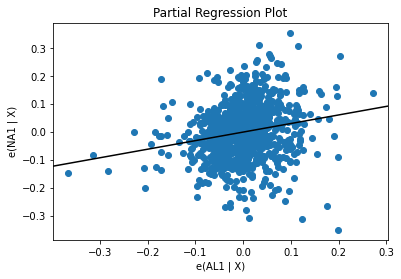

In [40]:
clean_oc_star_chemical_nooutlier.columns

#sm.graphics.plot_partregress_grid(model)
fig = sm.graphics.plot_partregress(
    "NA1", "AL1", ['MG1', 'LI1', 'SI1', 'CA1', 'SC2', 'TI1', 'TI2', 'V1', 'CR1', 'CR2', 'FE1', 'FE2', 'CO1', 'NI1', 'Y2', 'BA2'], obs_labels=False, data=clean_oc_star_chemical_nooutlier
)


## Tests for non-linearity

[Ramsey’s RESET test for neglected nonlinearity](https://www.statsmodels.org/devel/generated/statsmodels.stats.diagnostic.linear_reset.html): essentially add some nonlinear terms (in the variables, not in the coefficients) to the regression and see if the null hypothesis that their coefficients are $0$ is rejected.


In [41]:
from statsmodels.stats.diagnostic import linear_reset
lire = linear_reset(model)
print(lire)

<Wald test (chi2): statistic=1.9440648285613449, p-value=0.3783133667336791, df_denom=2>


/opt/anaconda3/envs/pavia00/lib/python3.9/site-packages/statsmodels/stats/diagnostic.py:1081: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  aug = res.fittedvalues[:, None]


## Multicolinearity and Variance Inflation Factor

The [Variance Inflation Factor](https://en.wikipedia.org/wiki/Variance_inflation_factor) is a way to measure how predictable a given regressor $x_i$ is from the other regressors.

\begin{equation}
\mathrm{VIF}_i = \frac{1}{1 - R^2_i}
\end{equation}

Here $R_i$ is the coefficient of determination of the regression of $x_i$ against the other regressors.
Note that if $R^2_i = 1$ then $x_i$ is completely determined given the other regressors. In this situation we have perfect collinearity, i.e. $x_i$ is a linear combination of some other regressors.

\begin{equation}
x_i = \alpha_0 + \alpha_1 x_1 + ... + \alpha_m x_m
\end{equaiton}

then when we write

\begin{equation}
\mathbf{y}_p = \hat{\beta}_0 + \hat{\beta}_1 \mathbf{x}_1 + ... + \hat{\beta}_n \mathbf{x}_n 
\end{equation}

there are infinite choices of the coefficients $\hat{\beta}$ that will yield exactly the same $\mathbf{y}_p$.
The regression is still good at predicting $\mathbf{y}_p$ but some of the individual coefficients become meaningless.

This is an extreme case where $\mathrm{VIF} = \infty$ but this problem still appears with finite but large $\mathrm{VIF}$. So it is worth checking.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
VIFs = [vif(clean_oc_star_chemical_nooutlier, i) for i in range(len(clean_oc_star_chemical_nooutlier.columns))]

In [ ]:
VIFs

The received wisdom is to throw away variables with VIF above $5$ or maybe $10$. LOL

In [ ]:
clean_oc_star_chemical_nooutlier.columns

At least here we have some guidance from astrochemistry: let's put together the different ionization states of each element.

In [ ]:
clean_oc_star_chemical_nooutlier["TI"] = 0.5*(clean_oc_star_chemical_nooutlier["TI1"] + clean_oc_star_chemical_nooutlier["TI2"])
clean_oc_star_chemical_nooutlier["FE"] = 0.5*(clean_oc_star_chemical_nooutlier["FE1"] + clean_oc_star_chemical_nooutlier["FE2"])
clean_oc_star_chemical_nooutlier["CR"] = 0.5*(clean_oc_star_chemical_nooutlier["CR1"] + clean_oc_star_chemical_nooutlier["CR2"])
clean_oc_star_chemical_nooutlier = clean_oc_star_chemical_nooutlier.drop(["TI1", "TI2", "FE1", "FE2", "CR1", "CR2"], axis=1)

In [ ]:
clean_oc_star_chemical_nooutlier

In [ ]:
VIFs = [vif(clean_oc_star_chemical_nooutlier, i) for i in range(len(clean_oc_star_chemical_nooutlier.columns))]
print(VIFs)
VIFs = np.array(VIFs)

The VIFs are still hilariously high. The features correlate strongly with each other. Let's kill the most correlated ones at least.

In [ ]:
while np.max(VIFs) > 400:
    element_with_highest_VIF = clean_oc_star_chemical_nooutlier.columns[np.argmax(VIFs)]
    print('Dropping ' + element_with_highest_VIF)
    clean_oc_star_chemical_nooutlier = clean_oc_star_chemical_nooutlier.drop(element_with_highest_VIF, axis=1)
    VIFs = [vif(clean_oc_star_chemical_nooutlier, i) for i in range(len(clean_oc_star_chemical_nooutlier.columns))]
    print(VIFs)
    VIFs = np.array(VIFs)

clean_oc_star_chemical_nooutlier

In [ ]:
VIFs = [vif(clean_oc_star_chemical_nooutlier, i) for i in range(len(clean_oc_star_chemical_nooutlier.columns))]
print(VIFs)
VIFs = np.array(VIFs)